In [26]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [63]:
df = pd.read_csv('./SegaGames.csv')
df['date_dt'] = pd.to_datetime(df['date'], errors='coerce')
print(df.shape)
df.head()

(1481, 10)


,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres,date_dt
0,NaN,Persona 3 Reload,XONE,"Feb 2, 2024",NaN,/game/xbox-one/persona-3-reload,NaN,['P-Studio'],"['Role-Playing', 'Japanese-Style']",2024-02-02
1,NaN,Persona 5 Tactica,PC,"Nov 17, 2023",NaN,/game/pc/persona-5-tactica,NaN,['P-Studio'],"['Strategy', 'Turn-Based', 'Tactics']",2023-11-17
2,NaN,Persona 5 Tactica,XONE,"Nov 17, 2023",NaN,/game/xbox-one/persona-5-tactica,RP,['P-Studio'],"['Strategy', 'Turn-Based', 'Tactics']",2023-11-17
3,NaN,Persona 5 Tactica,PS4,"Nov 17, 2023",NaN,/game/playstation-4/persona-5-tactica,NaN,['P-Studio'],"['Strategy', 'Turn-Based', 'Tactics']",2023-11-17
4,NaN,Persona 5 Tactica,Switch,"Nov 17, 2023",NaN,/game/switch/persona-5-tactica,RP,['P-Studio'],"['Strategy', 'Turn-Based', 'Tactics']",2023-11-17


<Axes: xlabel='platform', ylabel='count'>

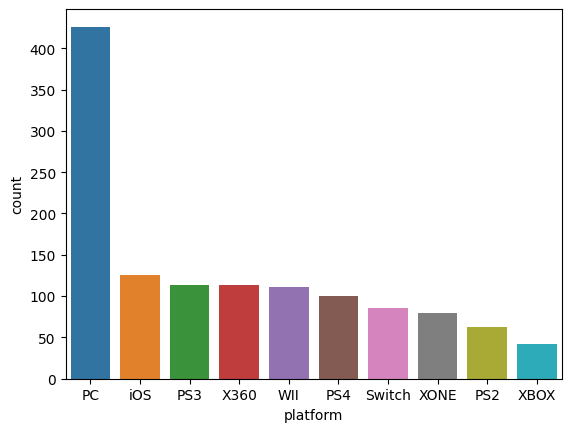

In [19]:
sns.barplot(data=df['platform'].value_counts().to_frame()[:10].reset_index(), x='platform', y='count')

In [79]:
px.line(df.groupby(by=[df['date_dt'].dt.year, df['platform']]).size().to_frame().reset_index().rename(columns={0:'count'}), x='date_dt', y='count', color='platform')

In [90]:
df[df['title'] == 'Vanquish']

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres,date_dt
204,77.0,Vanquish,PS4,"Feb 18, 2020",9.6,/game/playstation-4/vanquish,M,['PlatinumGames'],"['Action', 'Shooter', 'Third-Person', 'Arcade']",2020-02-18
206,NaN,Vanquish,XONE,"Feb 18, 2020",9.5,/game/xbox-one/vanquish,M,['Sega'],"['Action', 'Shooter', 'Third-Person', 'Arcade']",2020-02-18
389,78.0,Vanquish,PC,"May 25, 2017",9.0,/game/pc/vanquish,M,['PlatinumGames'],"['Action', 'Shooter', 'Third-Person', 'Arcade']",2017-05-25
843,84.0,Vanquish,PS3,"Oct 19, 2010",9.5,/game/playstation-3/vanquish,M,['PlatinumGames'],"['Action', 'Shooter', 'Shooter', 'Third-Person...",2010-10-19
844,84.0,Vanquish,X360,"Oct 19, 2010",9.6,/game/xbox-360/vanquish,M,['PlatinumGames'],"['Action', 'Shooter', 'Shooter', 'Third-Person...",2010-10-19


In [91]:
px.bar(df.sort_values(by='user_score', ascending=False)[:20], x='title', y='user_score', color='platform')

In [112]:
import ast
df['genres_array'] = df['genres'].apply(lambda s: ast.literal_eval(f'{s}'.replace('nan', 'None')))

In [131]:
aux = df['genres_array'].value_counts().to_frame().isna().reset_index()

In [142]:
import math

In [168]:
genres = []
for row in df['genres_array']:
  if row is not None:
    for genre in row:
      if genre not in genres:
        genres.append(genre)

for genre in genres:
  genre_to_append = []
  for row in df['genres_array']:
    if row is not None:
      if genre in row:
        genre_to_append.append(1)
      else:
        genre_to_append.append(0)
    else:
      genre_to_append.append(None)
  df[genre] = genre_to_append


In [166]:
df[df.columns[10:25]]

,genres_array,Role-Playing,Japanese-Style,Strategy,Turn-Based,Tactics,Action Adventure,General,Real-Time,Action,Platformer,2D,Rhythm,Music,Management
0,"[Role-Playing, Japanese-Style]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[Strategy, Turn-Based, Tactics]",0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[Strategy, Turn-Based, Tactics]",0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[Strategy, Turn-Based, Tactics]",0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[Strategy, Turn-Based, Tactics]",0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,"[Action, Rhythm, Music]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1477,"[Action Adventure, General]",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1478,"[Action Adventure, General]",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1479,"[Action Adventure, General]",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of 

Text(0, 0.5, 'Sum of squared distance')

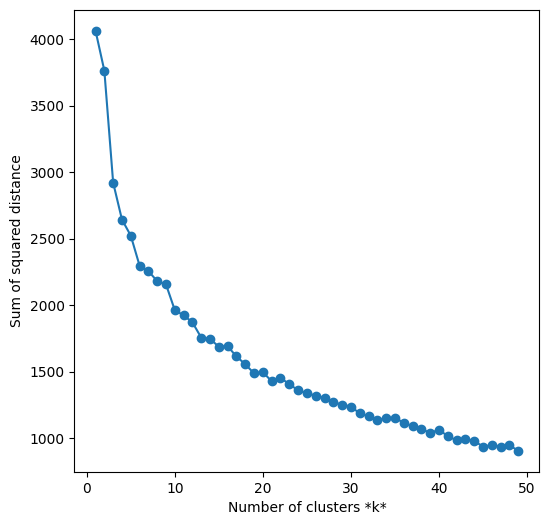

In [197]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

kmeans = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=6, n_init="auto")
sse = []
list_k = list(range(1, 50))

for k in list_k:
    km = MiniBatchKMeans(n_clusters=k)
    km.fit(df[genres + ['user_score']][~df['genres'].isna() & ~df['user_score'].isna()])
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [198]:
km = MiniBatchKMeans(n_clusters=50)
km.fit(df[genres + ['user_score']][~df['genres'].isna() & ~df['user_score'].isna()])

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



MiniBatchKMeans(n_clusters=50)

In [206]:
df['cluster'] = np.zeros(df.shape[0])
df.loc[~df['genres'].isna() & ~df['user_score'].isna(), 'cluster'] = km.predict(df[genres + ['user_score']][~df['genres'].isna() & ~df['user_score'].isna()])

In [258]:
px.bar(df, x='cluster', y='user_score')

In [268]:
df[df['cluster'] == 20]

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres,date_dt,...,Card Battle,GT / Street,Tycoon,Volleyball,Stock Car,Trivia / Game Show,Golf,Street,Demo Disc,cluster
92,77.0,Persona 4 Arena Ultimax,PC,"Mar 17, 2022",4.9,/game/pc/persona-4-arena-ultimax,T,['Arc System Works'],"['Action', 'Fighting', '2D']",2022-03-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
154,73.0,Football Manager 2021 Touch,Switch,"Dec 14, 2020",5.4,/game/switch/football-manager-2021-touch,NaN,['Sports Interactive'],"['Action', 'Sports', 'General', 'Team', 'Socce...",2020-12-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
430,NaN,10 Minute Tower,PC,"Jul 26, 2016",5.0,/game/pc/10-minute-tower,NaN,['Team17'],"['Puzzle', 'Action']",2016-07-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
545,NaN,"Warhammer 40,000: Kill Team",PC,"May 22, 2014",5.2,/game/pc/warhammer-40000-kill-team,NaN,['Nomad Games'],"['Action', 'Shooter', 'Third-Person', 'Sci-Fi'...",2014-05-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
581,NaN,Aliens: Colonial Marines - Stasis Interrupted,PC,"Jul 23, 2013",5.5,/game/pc/aliens-colonial-marines---stasis-inte...,M,['Gearbox Software'],"['Action', 'Shooter', 'Shooter', 'First-Person...",2013-07-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
661,59.0,Total War Battles: SHOGUN,PC,"Aug 29, 2012",6.3,/game/pc/total-war-battles-shogun,NaN,['Sega'],"['Action', 'General', 'General']",2012-08-29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
725,NaN,Renegade Ops: Coldstrike Campaign,PC,"Dec 19, 2011",5.7,/game/pc/renegade-ops-coldstrike-campaign,NaN,['Avalanche Studios'],"['Action', 'General', 'General', 'Shooter', ""S...",2011-12-19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
739,51.0,Captain America: Super Soldier,3DS,"Oct 25, 2011",6.5,/game/3ds/captain-america-super-soldier,T,['High Voltage Software'],"['Action', 'Action Adventure', 'General', 'Gen...",2011-10-25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
777,38.0,Thor: God of Thunder,X360,"May 3, 2011",5.7,/game/xbox-360/thor-god-of-thunder,T,['Liquid Entertainment'],"['Action', 'General', 'General', ""Beat-'Em-Up""...",2011-05-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
787,55.0,Super Monkey Ball 3D,3DS,"Mar 27, 2011",5.4,/game/3ds/super-monkey-ball-3d,E,['Sega'],"['Action', 'General', 'General']",2011-03-27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
